In [70]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

In [71]:
test_filename = './liar_dataset/test.tsv'
train_filename = './liar_dataset/train.tsv'
valid_filename = './liar_dataset/valid.tsv'

In [102]:
column_name = ['ID.json','label','statement','subject','speaker',"speaker's job title",'state','party affiliation','barely true counts','false counts','half true counts','mostly true counts','pants on fore counts','the context']
train_data_origin = pd.read_csv(train_filename, sep="\t")
test_data_origin = pd.read_csv(test_filename, sep="\t")
valid_data_origin = pd.read_csv(valid_filename, sep="\t")

train_data = train_data_origin.values.tolist()
test_data = test_data_origin.values.tolist()
valid_data = valid_data_origin.values.tolist()

train_data = pd.DataFrame(train_data, columns=column_name)
test_data = pd.DataFrame(test_data, columns=column_name)
valid_data = pd.DataFrame(valid_data, columns=column_name)

In [103]:
train_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [104]:
test_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [105]:
valid_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."


In [106]:
# extract label and statement
train_news = train_data.iloc[:,1:3]
test_news = test_data.iloc[:,1:3]
valid_news = test_data.iloc[:,1:3]

In [107]:
train_news.head()

,label,statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


In [108]:
# check the unique value of label
print(train_news['label'].value_counts())

half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64


In [109]:
# replace original label to binary label
train_news = train_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 1, 'pants-fire' : 0}})
test_news = test_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 1, 'pants-fire' : 0}})
valid_news = valid_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 1, 'pants-fire' : 0}})

In [110]:
train_news.head()

,label,statement
0,1,When did the decline of coal start? It started...
1,1,"Hillary Clinton agrees with John McCain ""by vo..."
2,0,Health care reform legislation is likely to ma...
3,1,The economic turnaround started at the end of ...
4,1,The Chicago Bears have had more starting quart...


In [111]:
print(train_news['label'].value_counts())

1    7406
0    2833
Name: label, dtype: int64


In [112]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

<AxesSubplot:xlabel='label', ylabel='count'>

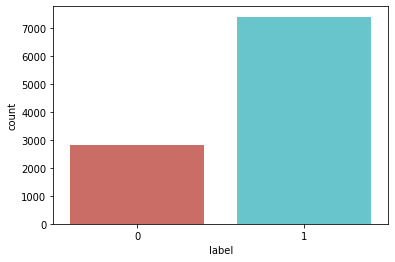

In [113]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)

In [126]:
# check missing label
def data_qualityCheck():
    print('train data')
    print(train_news.isnull().sum())
    train_news.info()
    print('\n')
        
    print('test data')
    print(test_news.isnull().sum())
    test_news.info()
    print('\n')

    print('valid data')
    print(valid_news.isnull().sum())
    valid_news.info()

In [127]:
data_qualityCheck()

train data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10239 non-null  int64 
 1   statement  10239 non-null  object
dtypes: int64(1), object(1)
memory usage: 160.1+ KB


test data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1266 non-null   int64 
 1   statement  1266 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.9+ KB


valid data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1266 n

In [138]:
# Feature select

In [139]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [140]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['statement'].values)

In [146]:
print(train_count.shape)
# (# of statement, # of word(all word in every statement) in statement)

(10239, 12195)


In [149]:
print(countV.get_feature_names_out()[1000:1010])
print(countV.vocabulary_)

['amniocentesis' 'among' 'amongst' 'amount' 'amounted' 'amounting'
 'amounts' 'ample' 'amputee' 'amtrak']
{'when': 11933, 'did': 3433, 'the': 10987, 'decline': 3184, 'of': 7671, 'coal': 2474, 'start': 10424, 'it': 6051, 'started': 10425, 'natural': 7417, 'gas': 4859, 'took': 11137, 'off': 7673, 'that': 10979, 'to': 11109, 'begin': 1531, 'in': 5686, 'president': 8553, 'george': 4909, 'bushs': 1963, 'administration': 751, 'hillary': 5400, 'clinton': 2443, 'agrees': 856, 'with': 12026, 'john': 6132, 'mccain': 6966, 'by': 1988, 'voting': 11747, 'give': 4953, 'bush': 1961, 'benefit': 1568, 'doubt': 3683, 'on': 7727, 'iran': 5998, 'health': 5309, 'care': 2095, 'reform': 9098, 'legislation': 6501, 'is': 6013, 'likely': 6604, 'mandate': 6833, 'free': 4734, 'sex': 9922, 'change': 2255, 'surgeries': 10720, 'economic': 3841, 'turnaround': 11350, 'at': 1258, 'end': 3989, 'my': 7373, 'term': 10938, 'chicago': 2312, 'bears': 1505, 'have': 5284, 'had': 5178, 'more': 7272, 'starting': 10427, 'quarterb